# Data Science Tools & Applications
# Assignment No. 2
# Author: Fahad Majeed
# ID: 210044316

> * **The workflow consists of following 5 steps:**

In [1]:
import numpy as np 
import pandas as pd 

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from scipy.stats import skew

from sklearn.linear_model import Ridge, ElasticNet,  Lasso
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor
import lightgbm as lgb
import xgboost as xg

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv("../input/house-prices-advanced-regression-techniques/test.csv")

data_b = data.drop(['Id'], axis=1) 
test_b = test.drop(['Id'], axis=1) 
data_b.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# 1. Feature Engineering:
> * **Analysis of Missing Values**

In [4]:
data_b.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
MSSubClass         0
dtype: int64

> * **Analysis of all features one-by-one using the following function**

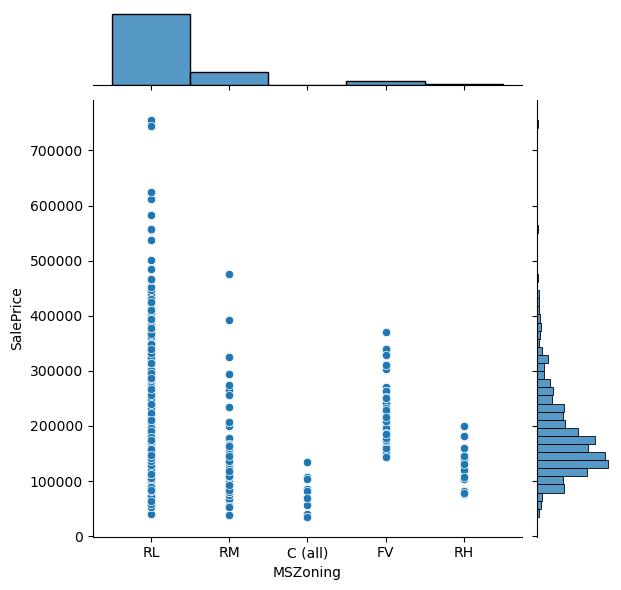


****INFO****
count     1460
unique       5
top         RL
freq      1151
Name: MSZoning, dtype: object

****VALUE COUNTS****
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

****VALUE AVG SALE PRICE****
MSZoning
C (all)     74528.000000
FV         214014.061538
RH         131558.375000
RL         191004.994787
RM         126316.830275
Name: SalePrice, dtype: float64

****TEST INFO****
count     1455
unique       5
top         RL
freq      1114
Name: MSZoning, dtype: object

****VALUE COUNTS****
RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64

Only in Train: []
Only in Test: []


In [5]:
def analyse_feature(feature_name):

    sns.jointplot(data=data_b, y="SalePrice", x=feature_name)
    plt.show()
    print("\n****INFO****")
    print(data_b[feature_name].describe())
    print("\n****VALUE COUNTS****")
    print(data_b[feature_name].value_counts())
    print("\n****VALUE AVG SALE PRICE****")
    print(data_b.groupby(feature_name)['SalePrice'].mean())
    if data_b[feature_name].dtype!="O":
        print("\nSkewness:",str(skew(data_b[feature_name])))

    print("\n****TEST INFO****")
    print(test_b[feature_name].describe())
    print("\n****VALUE COUNTS****")
    print(test_b[feature_name].value_counts())
    
    print("\nOnly in Train: "+str(list(set(data_b[feature_name].value_counts().index.values) - set(test_b[feature_name].value_counts().index.values))))
    print("Only in Test: "+ str(list(set(test_b[feature_name].value_counts().index.values) - set(data_b[feature_name].value_counts().index.values))))
    
analyse_feature("MSZoning")

> * **After Analysing Each Column -> Fill Missing Values**

In [6]:
test_b['MSZoning']=test_b['MSZoning'].fillna("C (all)") 
test_b['GarageCars']=test_b['GarageCars'].fillna(0) 
test_b['GarageArea']=test_b['GarageArea'].fillna(0) 
test_b['Functional']=test_b['Functional'].fillna("Typ") 
test_b['SaleType']=test_b['SaleType'].fillna("WD") 
test_b['SaleCondition']=test_b['SaleCondition'].fillna("Normal")
data_b['Fence']=data_b['Fence'].fillna("None") 
test_b['Fence']=test_b['Fence'].fillna("None") 
data_b['Electrical'] = data_b['Electrical'].fillna("SBrkr")
data_b['FireplaceQu'] = data_b['FireplaceQu'].fillna("None")
test_b['FireplaceQu'] = test_b['FireplaceQu'].fillna("None")
data_b['GarageType'] = data_b['GarageType'].fillna("None")
test_b['GarageType'] = test_b['GarageType'].fillna("None")
data_b['GarageQual'] = data_b['GarageQual'].fillna("None")
test_b['GarageQual'] = test_b['GarageQual'].fillna("None")
data_b['GarageCond'] = data_b['GarageCond'].fillna("None")
test_b['GarageCond'] = test_b['GarageCond'].fillna("None")
data_b['GarageFinish'] = data_b['GarageFinish'].fillna("None")
test_b['GarageFinish'] = test_b['GarageFinish'].fillna("None")
test_b['Exterior1st'] = test_b['Exterior1st'].fillna("VinylSd")
test_b['Exterior2nd']= test_b['Exterior2nd'].fillna("VinylSd")
data_b['MasVnrType'] = data_b['MasVnrType'].fillna("None")
test_b['MasVnrType'] = test_b['MasVnrType'].fillna("None")
data_b['MasVnrArea'] = data_b['MasVnrArea'].fillna(0)
test_b['MasVnrArea'] = test_b['MasVnrArea'].fillna(0)
test_b['BsmtHalfBath']=test_b['BsmtHalfBath'].fillna(0) 
test_b['BsmtFullBath']=test_b['BsmtFullBath'].fillna(0) 
test_b['KitchenQual']=test_b['KitchenQual'].fillna("Gd") 
test_b['TotalBsmtSF']=test_b['TotalBsmtSF'].fillna(0) 
test_b['BsmtUnfSF']=test_b['BsmtUnfSF'].fillna(0)
test_b['BsmtFinSF1']=test_b['BsmtFinSF1'].fillna(0) 
test_b['BsmtFinSF2']= test_b['BsmtFinSF2'].fillna(0) 
test_b['BsmtQual']=test_b['BsmtQual'].fillna("None") 
data_b['BsmtQual']=data_b['BsmtQual'].fillna("None")
test_b['BsmtCond']= test_b['BsmtCond'].fillna("None")
data_b['BsmtCond']= data_b['BsmtCond'].fillna("None")
test_b['BsmtExposure']= test_b['BsmtExposure'].fillna("None") 
data_b['BsmtExposure']= data_b['BsmtExposure'].fillna("None") 
test_b['Utilities']= test_b['Utilities'].fillna("AllPub") 
data_b['GarageYrBlt'] = data_b['GarageYrBlt'].fillna(1895)
test_b['GarageYrBlt'] = test_b['GarageYrBlt'].fillna(1895)

> * **After Analysing Each Column -> Fixing Outliers**

In [7]:
test_b.loc[test.GarageYrBlt==2207,'GarageYrBlt'] = 2007 
test_b.loc[test_b.LotArea==1533,'LotFrontage'] = 21 
data_b.loc[data_b.LotArea>40000,'LotArea'] = 40000
test_b.loc[test_b.LotArea>40000,'LotArea'] = 40000
data_b.loc[data_b.LotFrontage>150,'LotFrontage'] = 150
test_b.loc[test_b.LotFrontage>150,'LotFrontage'] = 150
data_b.loc[data_b["1stFlrSF"]>3000,'1stFlrSF'] = 3000
test_b.loc[test_b["1stFlrSF"]>3000,'1stFlrSF'] = 3000
data_b.loc[data_b["GrLivArea"]>4000,'GrLivArea'] = 4000
test_b.loc[test_b["GrLivArea"]>4000,'GrLivArea'] = 4000
data_b.loc[data_b["TotRmsAbvGrd"]>12,'TotRmsAbvGrd'] = 12
test_b.loc[test_b["TotRmsAbvGrd"]>12,'TotRmsAbvGrd'] = 12
data_b.loc[data_b["BsmtFinSF1"]>2200,'BsmtFinSF1'] = 2200
test_b.loc[test_b["BsmtFinSF1"]>2200,'BsmtFinSF1'] = 2200
data_b.loc[data_b["TotalBsmtSF"]>2500,'TotalBsmtSF'] = 2500
test_b.loc[test_b["TotalBsmtSF"]>2500,'TotalBsmtSF'] = 2500
data_b.loc[data_b["GarageCars"]>3,'GarageCars'] = 3
test_b.loc[test_b["GarageCars"]>3,'GarageCars'] = 3
data_b.loc[data_b["GarageArea"]>1000,'GarageArea'] = 1000
test_b.loc[test_b["GarageArea"]>1000,'GarageArea'] = 1000

#Simple Linear Reg to fill missin LotFrontage values
test_b.loc[test_b["LotFrontage"].isnull(),["LotFrontage"]]=(test_b.loc[test_b["LotFrontage"].isnull(),["LotArea"]]*0.00885-15.17).values
data_b.loc[data_b["LotFrontage"].isnull(),["LotFrontage"]]=(data_b.loc[data_b["LotFrontage"].isnull(),["LotArea"]]*0.00885-15.17).values

> * **Feature Extraction (Converting Years to Ages)**

In [8]:
data_b["Age"] = 2011 - data_b["YearBuilt"]
test_b["Age"] = 2011 - test_b["YearBuilt"]

data_b["RemodAfter"] = data_b["YearRemodAdd"] - data_b["YearBuilt"]
data_b["AgeRemodAdd"] = 2011 - data_b["YearRemodAdd"]

test_b["RemodAfter"] = test_b["YearRemodAdd"] - test_b["YearBuilt"]
test_b.loc[test_b.RemodAfter<0,'RemodAfter'] = 0
test_b["AgeRemodAdd"] = 2011 - test_b["YearRemodAdd"]

data_b["Age_Sold"] = data_b["YrSold"] - data_b["YearBuilt"] 
test_b["Age_Sold"] = test_b["YrSold"] - test_b["YearBuilt"]
test_b.loc[test_b.Age_Sold<0,'Age_Sold'] = 0

data_b["Sold_before"] = 2011 - data_b["YrSold"]
test_b["Sold_before"] = 2011 - test_b["YrSold"] 

data_b['Age_Garage'] = 2011 - data_b['GarageYrBlt']
test_b['Age_Garage'] = 2011 - test_b['GarageYrBlt']
data_b['Age_Garage_Sold'] = data_b["YrSold"] - data_b['GarageYrBlt']
test_b['Age_Garage_Sold'] = test_b["YrSold"] - test_b['GarageYrBlt']

data_b['TotalPorch']=data_b['EnclosedPorch'] + data_b['OpenPorchSF'] + data_b['ScreenPorch'] + data_b['3SsnPorch'] 
test_b['TotalPorch']=test_b['EnclosedPorch'] + test_b['OpenPorchSF'] + test_b['ScreenPorch'] + test_b['3SsnPorch'] 

data_b['TotalBath'] = data_b['FullBath']+ data_b['HalfBath']+ data_b['BsmtFullBath']+ data_b['BsmtHalfBath']
test_b['TotalBath'] = test_b['FullBath']+ test_b['HalfBath']+ test_b['BsmtFullBath']+ test_b['BsmtHalfBath']

In [9]:
#Update some values that is not exist one of two datasets
test_b['MSSubClass'] = test_b['MSSubClass'].replace(["150"], ["160"])
data_b['HouseStyle'] = data_b['HouseStyle'].replace(["2.5Fin"], ["2Story"])
data_b['Exterior1st'] = data_b['Exterior1st'].replace(['Stone', 'ImStucc'],['CemntBd', 'Stucco'])
data_b['Electrical'] = data_b['Electrical'].replace(["Mix","FuseF","FuseP"], ["SBrkr","FuseA","FuseA"])
test_b['Electrical'] = test_b['Electrical'].replace(["Mix","FuseF","FuseP"], ["SBrkr","FuseA","FuseA"])
test_b['BsmtCond'] = test_b['BsmtCond'].replace(["Ex"], ["Gd"])
data_b['GarageQual'] = data_b['GarageQual'].replace(["Ex"], ["Gd"])
data_b['GarageCond'] = data_b['GarageCond'].replace(["Ex"], ["Gd"])
test_b['GarageCond'] = test_b['GarageCond'].replace(["Ex"], ["Gd"])

In [10]:
y = data_b.pop("SalePrice")

> * **Check Missing values from Training set**

In [11]:
data_b.isnull().sum().sort_values(ascending=False).head(10)

PoolQC          1453
MiscFeature     1406
Alley           1369
BsmtFinType2      38
BsmtFinType1      37
GarageType         0
GarageCond         0
GarageQual         0
GarageArea         0
GarageCars         0
dtype: int64

> * **Check Missing values from Test set**

In [12]:
test_b.isnull().sum().sort_values(ascending=False).head(10)

PoolQC          1456
MiscFeature     1408
Alley           1352
BsmtFinType2      42
BsmtFinType1      42
GarageType         0
GarageCond         0
GarageQual         0
GarageArea         0
GarageCars         0
dtype: int64

> * **Drop Missing Columns**

In [13]:
data_b = data_b.dropna(axis=1) 
test_b = test_b.dropna(axis=1)

> * **After Analysing Each Column -> Drop Insignificant Columns**

In [14]:
data_b = data_b.drop(["YearBuilt","YearRemodAdd","Street","Condition2","LowQualFinSF","RoofMatl","Exterior2nd","OpenPorchSF","EnclosedPorch",
                    "3SsnPorch","ScreenPorch","PoolArea","MiscVal","YrSold","Utilities","Heating","KitchenAbvGr","GarageYrBlt"], axis=1) 
test_b = test_b.drop(["YearBuilt","YearRemodAdd","Street","Condition2","LowQualFinSF","RoofMatl","Exterior2nd","OpenPorchSF","EnclosedPorch",
                    "3SsnPorch","ScreenPorch","PoolArea","MiscVal","YrSold","Utilities","Heating","KitchenAbvGr","GarageYrBlt"], axis=1)

# 2. Transforming Categorical Variables:

In [15]:
#Split Categorical / Numeric
cols = data_b.columns
numeric_columns, categorical_columns = [], []
for i in range(len(cols)):
    if data_b[cols[i]].dtypes == 'O':
        categorical_columns.append(cols[i])
    else:
        numeric_columns.append(cols[i])

#Show Unique items in categorical variables
category_analysis = pd.DataFrame(categorical_columns, columns = ["Feature"])
unique_values = []
unique_counts = []
for col in categorical_columns:
    unique_values.append(data_b[col].unique())
    unique_counts.append(len(data_b[col].unique()))
    
category_analysis["Categories"] = unique_values
category_analysis["Number"] = unique_counts
category_analysis

,Feature,Categories,Number
0,MSZoning,"[RL, RM, C (all), FV, RH]",5
1,LotShape,"[Reg, IR1, IR2, IR3]",4
2,LandContour,"[Lvl, Bnk, Low, HLS]",4
3,LotConfig,"[Inside, FR2, Corner, CulDSac, FR3]",5
4,LandSlope,"[Gtl, Mod, Sev]",3
5,Neighborhood,"[CollgCr, Veenker, Crawfor, NoRidge, Mitchel, ...",25
6,Condition1,"[Norm, Feedr, PosN, Artery, RRAe, RRNn, RRAn, ...",9
7,BldgType,"[1Fam, 2fmCon, Duplex, TwnhsE, Twnhs]",5
8,HouseStyle,"[2Story, 1Story, 1.5Fin, 1.5Unf, SFoyer, SLvl,...",7
9,RoofStyle,"[Gable, Hip, Gambrel, Mansard, Flat, Shed]",6


> * **Convert Categorical variables into ONE HOT ENCODING**

In [16]:
data_b = pd.get_dummies(data_b)
test_b = pd.get_dummies(test_b)

# 3. Log Level Transformation:

In [17]:
skewed_feats = data_b.apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)

#New data 
data_b_skewed = data_b.copy()
test_b_skewed = test_b.copy()

skewness = skewness[abs(skewness) > 1]
print("There are {} skewed numerical features to Log1p transform".format(skewness.shape[0]))

skewed_features = skewness.index
for feat in skewed_features:
    data_b_skewed[feat] = np.log1p(data_b_skewed[feat])
    test_b_skewed[feat] = np.log1p(test_b_skewed[feat])


Skew in numerical features: 

There are 223 skewed numerical features to Log1p transform


In [18]:
print("\nOnly in Train: "+ str(list(set(data_b_skewed.columns) - set(test_b_skewed.columns))))
print("Only in Test: "+ str(list(set(test_b_skewed.columns) - set(data_b_skewed.columns))))


Only in Train: []
Only in Test: []


In [19]:
# Convert Target also Log level
y_log = np.log1p(y)

In [20]:
#Convert -INF to Zero
test_b_skewed=test_b_skewed.replace(-np.Inf, 0)

# 4. Training Different Models:
> I trained 4 models by mostly-used algorithms

In [21]:
#Run Cross validation for each Model 
def run_cvs(X,y):
    
    baseline = lgb.LGBMRegressor(learning_rate=0.01,num_leaves=4,n_estimators=2000, random_state=0)
    baseline_score = cross_val_score(baseline, X, y, cv=10)
    print("LGBM avg:",np.mean(baseline_score))

    baseline = xg.XGBRegressor(learning_rate=0.01,n_estimators=2000, subsample=0.7,colsample_bytree=0.7,random_state=0)
    baseline_score = cross_val_score(baseline, X, y, cv=10)
    print("XGB avg:",np.mean(baseline_score))
    
    baseline = CatBoostRegressor(random_state=0,verbose=0)
    baseline_score = cross_val_score(baseline, X, y, cv=10)
    print("CatB avg:",np.mean(baseline_score))

    baseline = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.02,max_depth=4, max_features='sqrt',
                min_samples_leaf=15, min_samples_split=50,loss='huber', random_state = 0)
    baseline_score = cross_val_score(baseline, X, y, cv=10)
    print("GBR avg:",np.mean(baseline_score))
    
run_cvs(data_b_skewed,y_log)

LGBM avg: 0.8998234725965346
XGB avg: 0.9114278665679272
CatB avg: 0.9145825780429611
GBR avg: 0.9074841598297718


# 5. Blending Models:
> I simply averaged 4 models

In [22]:
#Combine 4 models
def make_submission(X_train, y_train, X_test):    
    sub_df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv', index_col = "Id")
    
    lgbr = lgb.LGBMRegressor(learning_rate=0.01,num_leaves=4,n_estimators=2000, random_state=0).fit(X_train,y_train)
    lgbr_preds_log=lgbr.predict(X_test)

    catB = CatBoostRegressor(random_state=0,verbose=0).fit(X_train,y_train)
    catB_preds_log=catB.predict(X_test)

    xgb = xg.XGBRegressor(learning_rate=0.01,n_estimators=2000, subsample=0.7,colsample_bytree=0.7,random_state=0).fit(X_train,y_train)
    xgb_preds_log=xgb.predict(X_test)
    
    gbr = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.02,max_depth=4, max_features='sqrt',
                min_samples_leaf=15, min_samples_split=50,loss='huber', random_state = 0).fit(X_train,y_train)
    gbr_preds_log=gbr.predict(X_test)
    
    lgbr_catb_xgb_gbr_mean_preds_log=(lgbr_preds_log+catB_preds_log+xgb_preds_log+gbr_preds_log)/4
    sub_df['SalePrice'] = np.exp(lgbr_catb_xgb_gbr_mean_preds_log)-1
    sub_df.to_csv("submission.csv")
    
make_submission(data_b_skewed,y_log,test_b_skewed) 